In [2]:
!pip install pandas numpy matplotlib scikit-learn


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     3.0           0     0          3        1340              0      2008   
1     2.0           0     0          3        3540              0      2007   
2     2.0           0     0          3        6420            850      2010   
3     2.0           0     0          3         798            200      2007   
4     1.0           0     0          5        1600           1460      1979   

   yr_renovated                   stre

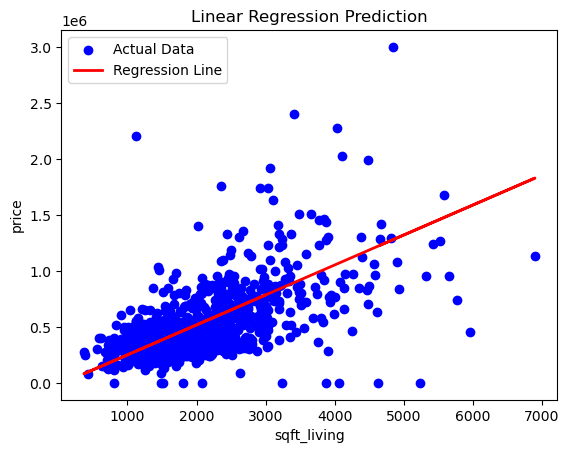

R² Score: 0.2883
Mean Squared Error: 74615443870.8125
Low R² indicates a weak model. Consider adding more features.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import os 

file_path = 'USA Housing Dataset.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset not found: {file_path}")

df = pd.read_csv(file_path)

print(df.head())
print(df.info())

feature = 'sqft_living'
target = 'price' 

if feature not in df.columns or target not in df.columns:
    raise KeyError(f"Columns '{feature}' or '{target}' not found in dataset.")

X = df[[feature]]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel(feature)
plt.ylabel(target)
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

if r2 > 0.7:
    print("High R² indicates a good fit.")
elif r2 > 0.4:
    print("Moderate R² suggests a decent fit but could be improved.")
else:
    print("Low R² indicates a weak model. Consider adding more features.")


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

file_path = "car data.csv"  
df = pd.read_csv(file_path)

print(df.head())
print(df.describe())
print(df.info())

selected_features = ["Year", "Driven_kms", "Transmission", "Fuel_Type"]
target = "Selling_Price"

df = df[selected_features + [target]].dropna()

df = pd.get_dummies(df, columns=["Fuel_Type"], drop_first=True)
df = pd.get_dummies(df, columns=["Transmission"], drop_first=True)

X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficients})
print("\n🔹 Feature Importance Table:")
print(coeff_df)

print(f"\n🔹 Model Intercept: {intercept:.2f}")
print(f"🔹 R² Score: {r2:.4f}")
print(f"🔹 Mean Squared Error: {mse:.4f}")

most_impactful = coeff_df.loc[coeff_df["Coefficient"].abs().idxmax()]
print(f"\n🔹 The feature with the highest impact: {most_impactful['Feature']} ({most_impactful['Coefficient']:.2f})")


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0


 Coefficients Comparison Table:
               Feature  Linear Regression Coeff  Ridge Regression Coeff
0                 Year                 1.068887                1.065393
1           Driven_kms                -0.068989               -0.068668
2     Fuel_Type_Diesel                 2.428978                2.278710
3     Fuel_Type_Petrol                -0.235863               -0.381122
4  Transmission_Manual                -1.575998               -1.571542


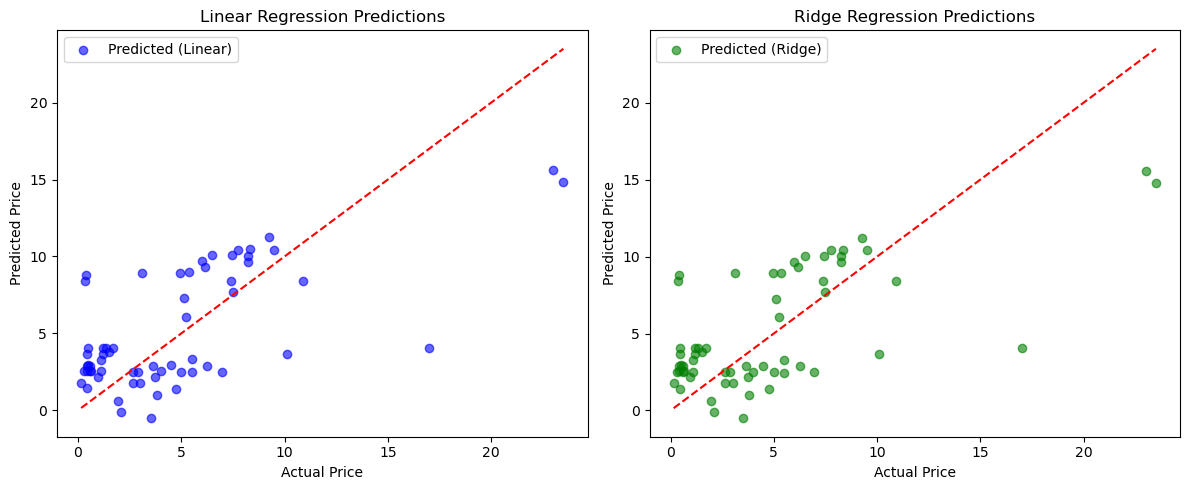


 R² Score (Linear Regression): 0.4158
 Mean Squared Error (Linear Regression): 13.4578
 R² Score (Ridge Regression): 0.4165
 Mean Squared Error (Ridge Regression): 13.4416

 Ridge Regression has smaller coefficients, reducing overfitting risk!


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error

file_path = "car data.csv"  
df = pd.read_csv(file_path)

selected_features = ["Year", "Driven_kms", "Transmission", "Fuel_Type"]
target = "Selling_Price"

df = df[selected_features + [target]].dropna()

df = pd.get_dummies(df, columns=["Fuel_Type", "Transmission"], drop_first=True)

X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)

lin_reg.fit(X_train_scaled, y_train)
ridge_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

r2_lin = r2_score(y_test, y_pred_lin)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear Regression Coeff": lin_reg.coef_,
    "Ridge Regression Coeff": ridge_reg.coef_
})
print("\n Coefficients Comparison Table:")
print(coeff_df)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color="blue", alpha=0.6, label="Predicted (Linear)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression Predictions")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color="green", alpha=0.6, label="Predicted (Ridge)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression Predictions")
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n R² Score (Linear Regression): {r2_lin:.4f}")
print(f" Mean Squared Error (Linear Regression): {mse_lin:.4f}")
print(f" R² Score (Ridge Regression): {r2_ridge:.4f}")
print(f" Mean Squared Error (Ridge Regression): {mse_ridge:.4f}")

if abs(coeff_df["Linear Regression Coeff"]).max() > abs(coeff_df["Ridge Regression Coeff"]).max():
    print("\n Ridge Regression has smaller coefficients, reducing overfitting risk!")
else:
    print("\n Ridge coefficients are similar to Linear Regression, try tuning alpha!")


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df["Target"] = california.target 

df = df.dropna()

X = df.drop(columns=["Target"])
y = df["Target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Lasso Coefficient": lasso.coef_
})
zero_coeffs = coefficients[coefficients["Lasso Coefficient"] == 0]
selected_features = coefficients[coefficients["Lasso Coefficient"] != 0]

y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\n🔹 Features Eliminated by Lasso (Zero Coefficients):")
print(zero_coeffs)

print("\n✅ Selected Features (Non-Zero Coefficients):")
print(selected_features)

print(f"\n🔹 R² Score: {r2:.4f}")
print(f"🔹 Mean Squared Error: {mse:.4f}")

if len(zero_coeffs) > 0:
    print("\n✅ Lasso Regression removed some features, improving model interpretability!")
else:
    print("\n⚠️ No features were eliminated. Try increasing alpha (e.g., 0.5 or 1.0) for stronger feature selection.")



🔹 Features Eliminated by Lasso (Zero Coefficients):
      Feature  Lasso Coefficient
2    AveRooms               -0.0
3   AveBedrms                0.0
4  Population               -0.0
5    AveOccup               -0.0
7   Longitude               -0.0

✅ Selected Features (Non-Zero Coefficients):
    Feature  Lasso Coefficient
0    MedInc           0.709186
1  HouseAge           0.106475
6  Latitude          -0.011479

🔹 R² Score: 0.4814
🔹 Mean Squared Error: 0.6796

✅ Lasso Regression removed some features, improving model interpretability!



 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



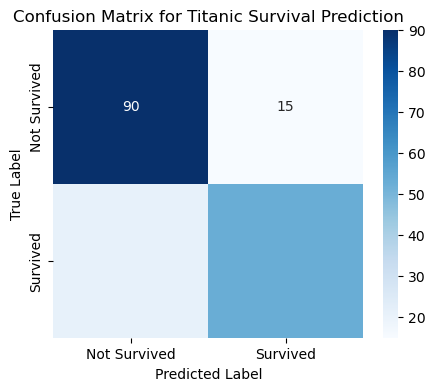

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
target = "Survived"
df = df[features + [target]]

df["Age"].fillna(df["Age"].median(), inplace=True)

df["Sex"] = LabelEncoder().fit_transform(df["Sex"])

X = df.drop(columns=[target])
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)
print("\n Classification Report:\n", class_report)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Titanic Survival Prediction")
plt.show()
